# Pyomo -  linearno programiranje

Ovaj primer ilustruje korišćenje biblioteke Pyomo u radu sa zadacima linearnog programiranja. Rešavač koji ćemo koristiti se zove <a href='https://www.gnu.org/software/glpk/'>GLPK</a> (GNU Linear Programming Kit) i predstavlja zapravo grupu rešavača (uključuje simpleks metod, metod unutrašnje tačke, metod *branch-and-cut* i mnoge druge). GLPK je potrebno instalirati naredbom `conda install -c conda-forge glpk` pre daljeg rada.  

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
from pyomo.environ import *

Zadatak koji ćemo rešavati tiče se optimizovanja proizvodnje jedne fabrike. Naime, fabrika proizvodi dva tipa proizvoda `X` i `Y` koji joj na mesečnom nivou po proizvedenom primerku donose profit od, redom, 40 dolara i 30 dolara. Da bi se proizveo proizvod `X` potreban je jedan sat rada radnika `A` i dva sata rada radnika `B`, a da bi se proizveo proizvod `Y` po jedan sat rada radnika `A` i `B`. Ako radnik `A` mesečno radi 80 sati, a radnik `B` 100 sati i ako je poznato da tržište zahteva najviše 40 primeraka proizvoda `X`, kako organizovati proizvodnju ove fabrike tako da profit bude što je moguće veći? 

Pošto se zbog svoje forme za male dimenzije linearni modeli često i grafički predstavljaju, nadalje sledi prikaz ograničenja kao i površine koja predstavlja prostor dopustivih rešenja.

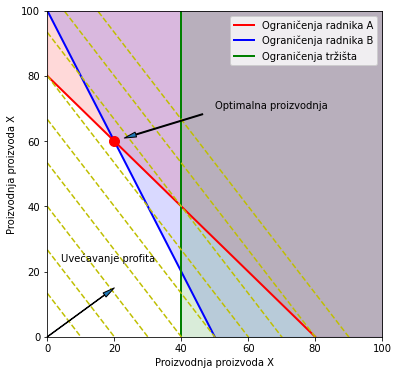

In [14]:
# podešavamo panel za crtanje 
plt.figure(figsize=(6, 6))
plt.axis([0, 100, 0, 100])
plt.xlabel('Proizvodnja proizvoda X')
plt.ylabel('Proizvodnja proizvoda X')

# predstavljamo ograničenja radnika A
x = np.array([0, 80])
y = 80 - x
plt.plot(x, y, 'r', lw=2)
plt.fill_between([0, 80, 100], [80, 0, 0], [100, 100, 100], color='r', alpha=0.15)

# predstavljamo ograničenja radnika B
x = np.array([0, 50])
y = 100 - 2*x
plt.plot(x, y, 'b', lw=2)
plt.fill_between([0, 50, 100], [100, 0, 0], [100, 100, 100], color='b', alpha=0.15)

# predstavljamo uslove tržišta
plt.plot([40, 40], [0, 100], 'g', lw=2)
plt.fill_between([40, 100], [0, 0], [100, 100], color='g', alpha=0.15)

plt.legend(['Ograničenja radnika A', 'Ograničenja radnika B', 'Ograničenja tržišta'])

# dodajemo šrafuru
x = np.array([0, 100])
for p in np.linspace(0, 3600, 10):
    y = (p - 40*x)/30
    plt.plot(x, y, 'y--')

    
# dodajemo informacije o rešenju
plt.plot(20, 60, 'r.', ms=20)
plt.annotate('Optimalna proizvodnja', xy=(20, 60), xytext=(50, 70), arrowprops=dict(shrink=.1, width=1, headwidth=5))

plt.text(4, 23, 'Uvećavanje profita')
plt.annotate('', xy=(20, 15), xytext=(0, 0), arrowprops=dict(width=0.5, headwidth=5))

# prikazujemo grafik
plt.show()